<center>

# Should This Loan be Approved or Denied?

## *Book Zero: Dataset Exploration*

</center>

### ABSTRACT

For this case-study assignment, students assume the role of loan officer at a bank and are asked to approve or deny a loan by assessing its risk of default using 

---

## I. Enviroment

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
#from IPython.display import display, HTML
from MungingOps import GetDataDictionary

In [61]:
filterwarnings('ignore')

### Styling

In [62]:
#
pd.options.display.float_format = '{:.5f}'.format
#--
sns.set_style("whitegrid")

---

## II. Load and understand the data

### 1. Load Data

The arff files contains in the header a file descriptor, then we can obtain valuable information about the dataset

In [63]:
#Read csv file
#RawDf = pd.read_csv('../input/should-this-loan-be-approved-or-denied/SBAnational.csv', header ='infer')
raw_df = pd.read_csv('./raw/SBAnational.csv', header ='infer')

### 2. Dataset Structure

In [64]:
raw_df.shape

(899164, 27)

In [65]:
raw_df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [66]:
description = raw_df.describe(include='all').T
description.to_excel('./original_metadata.xlsx')# To put in the report
display(description)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
LoanNr_ChkDgt,899164.00000,NaN,NaN,NaN,4772612310.59431,2538175037.45304,1000014003.00000,2589757508.50000,4361439006.00000,6904626504.75000,9996003010.00000
Name,899150,779583,SUBWAY,1269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,899134,32581,LOS ANGELES,11558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,899150,51,CA,130619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip,899164.00000,NaN,NaN,NaN,53804.39124,31184.15915,0.00000,27587.00000,55410.00000,83704.00000,99999.00000
Bank,897605,5802,BANK OF AMERICA NATL ASSOC,86853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankState,897598,56,CA,118116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NAICS,899164.00000,NaN,NaN,NaN,398660.95015,263318.31276,0.00000,235210.00000,445310.00000,561730.00000,928120.00000
ApprovalDate,899164,9859,7-Jul-93,1131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovalFY,899164.00000,75.00000,2006.00000,76039.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first step is change the column case and subtitute acronymes to improve readability

In [67]:
new_columns =   {'id':                      'Identifier - Primary key'
                 ,'borrower_name':          'Borrower Name'
                 ,'borrower_city':          'Borrower city'
                 ,'borrower_state':         'Borrower state'
                 ,'borrower_zip':           'Borrower zip code'
                 ,'bank_name':              'Bank name'
                 ,'bank_state':             'Bank state'
                 ,'naic':                   'North American Industry classification'
                 ,'approval_date':          'Date SBA commitment issued'
                 ,'approval_fiscal_year':   'Fiscal year of commitment'
                 ,'spected_term':           'Loan termination months'
                 ,'employees':              'Number of business employees'
                 ,'business_type':          'Business Type'
                 ,'created_jobs':           'Number of jobs created'
                 ,'retained_jobs':          'Number of jobs retained'
                 ,'franchise':              'Franchise code'
                 ,'urban':                  'Urban or Rural'
                 ,'revolving_credit':       'Revolving line of credit'
                 ,'low_doc_loan':           'LowDoc Loan Program' 
                 ,'default_date':           'loan default´s declaration date'
                 ,'disbursement_date':      'the date upon which the Loan proceeds'
                 ,'amount_disbursed':       'Amount disbursed'
                 ,'gross_amount_outstanding':'the total of all remaining payments due under a Contract plus any other amount due thereunder'
                 ,'loan_status':            'Loan Status'
                 # 'charged_off_amount' == > 'ghargedoff_amount'
                 ,'charged_off_amount':     'debt that a company believes it will no longer collect as the borrower has become delinquent on payments'
                 ,'gross_amount_approved':  'gross disbursements represent the amount of checks issued, cash, or other payments made, less refunds received'
                 ,'guaranteed_sba':         'SBA´s guaranteed amount'
}


Check for errors in list len

In [68]:
len(raw_df.columns)-len(new_columns.keys())

0

In [69]:
variables=raw_df
variables.columns = new_columns.keys()
display(variables)

,id,borrower_name,borrower_city,borrower_state,borrower_zip,bank_name,bank_state,naic,approval_date,approval_fiscal_year,...,revolving_credit,low_doc_loan,default_date,disbursement_date,amount_disbursed,gross_amount_outstanding,loan_status,ghargedoff_amount,gross_amount_approved,guaranteed_sba
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


### 3. Variable Clasification

Create a Data Dictionary

In [70]:
data_dictionary = GetDataDictionary(variables,new_columns)
display(data_dictionary)

The number of variables in the raw dataset is: 27


,Variable,Cluster,Disctint,Values,Type,Nulls,Description
Id,,,,,,,
21,amount_disbursed,4,118859,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,Amount disbursed
4,borrower_zip,4,33611,"[47711, 46526, 47401, 74012, 32801, 6062, 7083...",numpy.int64,0,Borrower zip code
19,default_date,4,6449,"[nan, 24-Jun-91, 18-Apr-02, 4-Oct-89, 26-Jun-1...",float,736465,loan default´s declaration date
20,disbursement_date,4,8473,"[28-Feb-99, 31-May-97, 31-Dec-97, 30-Jun-97, 1...",str,2368,the date upon which the Loan proceeds
1,borrower_name,4,779584,"[ABC HOBBYCRAFT, LANDMARK BAR & GRILLE (THE), ...",str,14,Borrower Name
24,ghargedoff_amount,4,83165,"[$0.00 , $208,959.00 , $14,084.00 , $44,374.00...",str,0,debt that a company believes it will no longer...
25,gross_amount_approved,4,22128,"[$60,000.00 , $40,000.00 , $287,000.00 , $35,0...",str,0,gross disbursements represent the amount of ch...
2,borrower_city,4,32582,"[EVANSVILLE, NEW PARIS, BLOOMINGTON, BROKEN AR...",str,30,Borrower city
26,guaranteed_sba,4,38326,"[$48,000.00 , $32,000.00 , $215,250.00 , $28,0...",str,0,SBA´s guaranteed amount


In [71]:
variables.describe().T

,count,mean,std,min,25%,50%,75%,max
id,899164.00000,4772612310.59431,2538175037.45304,1000014003.00000,2589757508.50000,4361439006.00000,6904626504.75000,9996003010.00000
borrower_zip,899164.00000,53804.39124,31184.15915,0.00000,27587.00000,55410.00000,83704.00000,99999.00000
naic,899164.00000,398660.95015,263318.31276,0.00000,235210.00000,445310.00000,561730.00000,928120.00000
spected_term,899164.00000,110.77308,78.85731,0.00000,60.00000,84.00000,120.00000,569.00000
employees,899164.00000,11.41135,74.10820,0.00000,2.00000,4.00000,10.00000,9999.00000
business_type,899028.00000,1.28040,0.45175,0.00000,1.00000,1.00000,2.00000,2.00000
created_jobs,899164.00000,8.43038,236.68817,0.00000,0.00000,0.00000,1.00000,8800.00000
retained_jobs,899164.00000,10.79726,237.12060,0.00000,0.00000,1.00000,4.00000,9500.00000
franchise,899164.00000,2753.72593,12758.01914,0.00000,1.00000,1.00000,1.00000,99999.00000
urban,899164.00000,0.75775,0.64644,0.00000,0.00000,1.00000,1.00000,2.00000


<AxesSubplot: >

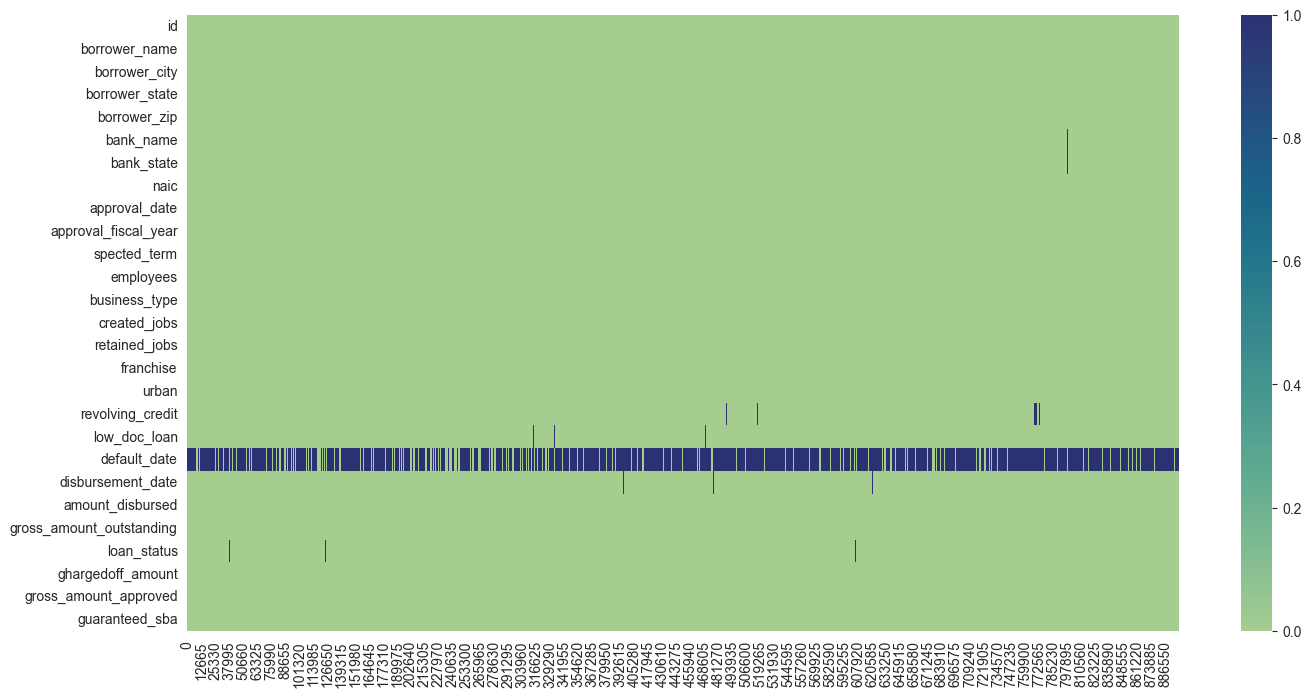

In [72]:
figure = plt.figure(figsize=(16, 8))
sns.heatmap(variables.T.isnull(), cmap="crest", annot=False)

* The BorrowerName have nulls but the id not, then we need to delete the BorrowerName, is not usefull for the exercise. Is a duplicate data

---

## III. Save Observations

In [73]:
# Save Data Dictionary to avoid recalculate
data_dictionary.to_pickle('./dta_00_data_dict.dd',compression='gzip',protocol=0)
# Save the Normalized Columns
variables.to_pickle('./dta_00_dataset.dd',compression='gzip',protocol=0)